In [1]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sys.path.append('../src/features')
import build_features as bf

In [63]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [6]:
targets = pd.DataFrame(originalDF.TARGET.value_counts())

In [9]:
targets['Pct'] = targets['TARGET']/targets['TARGET'].sum()

In [10]:
targets

,TARGET,Pct
0,282686,0.919271
1,24825,0.080729


In [22]:
descriptionsDF = pd.read_csv("../reports/HomeCredit_columns_description.csv")

In [32]:
for i in originalDF.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [25]:
descriptionsDF[descriptionsDF['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [39]:
import seaborn as sns

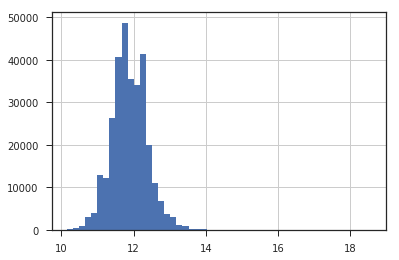

In [47]:
np.log(originalDF['AMT_INCOME_TOTAL']).hist(bins = 50)

In [50]:
amtMean = np.log(originalDF['AMT_INCOME_TOTAL']).mean()
amtMean = np.log(originalDF['AMT_INCOME_TOTAL']).std()

In [64]:
def normalizeIncome(dfIn):
    """Log transform income and standardize income"""
    nIncome = np.log(dfIn['AMT_INCOME_TOTAL'])
    nIncome.rename('logAMT_INCOME', inplace = True)
    nMean = dfIn['AMT_INCOME_TOTAL'].mean() ## Finds mean
    nStd = dfIn['AMT_INCOME_TOTAL'].std() ## Finds standard deviation
    nIncome = (nIncome - nMean)/nStd ## Standardization
    dfIn = pd.concat([dfIn, nIncome], axis = 1)
    return dfIn

In [69]:
originalDF = pd.read_csv("../data/raw/application_train.csv")

In [70]:
nIncome = np.log(originalDF['AMT_INCOME_TOTAL'])

In [76]:
nIncome.rename('logAMT_INCOME', inplace = True)

0         12.218495
1         12.506177
2         11.119883
3         11.813030
4         11.707670
5         11.502875
6         12.049419
7         12.793859
8         11.630709
9         11.813030
10        11.630709
11        10.556311
12        11.119883
13        12.323856
14        12.149502
15        11.967181
16        11.589887
17        11.302204
18        11.630709
19        11.407565
20        11.813030
21        12.218495
22        13.017003
23        11.329603
24        11.813030
25        11.407565
26        11.630709
27        11.630709
28        12.506177
29        11.407565
            ...    
307481    12.323856
307482    12.323856
307483    11.502875
307484    13.199324
307485    12.506177
307486    12.586220
307487    11.669929
307488    11.967181
307489    12.323856
307490    11.302204
307491    11.407565
307492    13.279367
307493    11.813030
307494    12.506177
307495    12.100712
307496    12.793859
307497    12.100712
307498    12.196022
307499    11.302204


In [77]:
nMean = originalDF['AMT_INCOME_TOTAL'].mean()
nStd = originalDF['AMT_INCOME_TOTAL'].std()
nIncome = (nIncome - nMean)/nStd

In [83]:
nMean

168797.9192969845

In [85]:
nStd

237123.14627883647

In [86]:
nIncome

0        -0.711806
1        -0.711805
2        -0.711811
3        -0.711808
4        -0.711808
5        -0.711809
6        -0.711807
7        -0.711804
8        -0.711809
9        -0.711808
10       -0.711809
11       -0.711813
12       -0.711811
13       -0.711806
14       -0.711806
15       -0.711807
16       -0.711809
17       -0.711810
18       -0.711809
19       -0.711810
20       -0.711808
21       -0.711806
22       -0.711803
23       -0.711810
24       -0.711808
25       -0.711810
26       -0.711809
27       -0.711809
28       -0.711805
29       -0.711810
            ...   
307481   -0.711806
307482   -0.711806
307483   -0.711809
307484   -0.711802
307485   -0.711805
307486   -0.711805
307487   -0.711808
307488   -0.711807
307489   -0.711806
307490   -0.711810
307491   -0.711810
307492   -0.711802
307493   -0.711808
307494   -0.711805
307495   -0.711807
307496   -0.711804
307497   -0.711807
307498   -0.711806
307499   -0.711810
307500   -0.711805
307501   -0.711810
307502   -0.

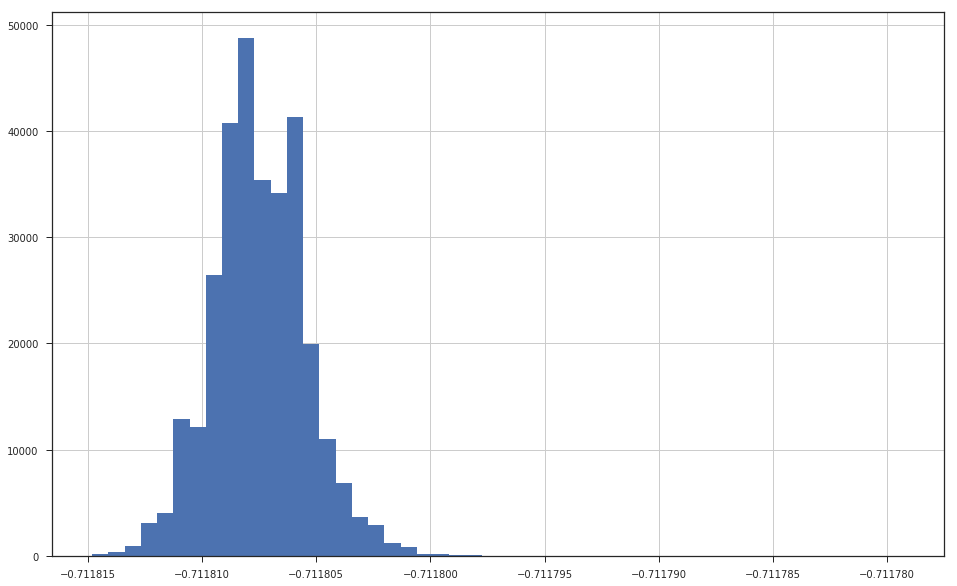

In [82]:
nIncome.hist(bins = 50, figsize = (16,10))